In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from pandasql import sqldf

sql = lambda q: sqldf(q, globals())


base_df = pd.read_csv('../data/acled_covid19.csv')
extd_df = pd.read_csv('../data/EXPANDED_acled_covid19.csv')

In [46]:
df = sql('''
SELECT DISTINCT sub_event_type
FROM extd_df
''')
df

,sub_event_type
0,Peaceful protest
1,Protest with intervention
2,Change to group/activity
3,Looting/property destruction
4,Attack
5,Violent demonstration
6,Abduction/forced disappearance
7,Other
8,Mob violence
9,Arrests


In [47]:
query_fmt = ''
for i, t in enumerate(df['sub_event_type']):
    t_cln = t.replace(" ", "_")
    t_cln = t_cln.replace("/", "_")
    query_fmt += f'sum(CASE WHEN sub_event_type = "{t}" THEN 1 ELSE 0 END ) AS "{t_cln}"'
    if i < len(df['sub_event_type']) - 1:
        query_fmt += ',\n'
        

type_cnt_df = sql(f'''
SELECT source_singular,
{query_fmt}
FROM extd_df
GROUP BY source_singular
''')
type_cnt_df

,source_singular,Peaceful_protest,Protest_with_intervention,Change_to_group_activity,Looting_property_destruction,Attack,Violent_demonstration,Abduction_forced_disappearance,Other,Mob_violence,Arrests,Disrupted_weapons_use,Excessive_force_against_protesters,Remote_explosive_landmine_IED,Sexual_violence,Armed_clash,Grenade,Agreement,Shelling_artillery_missile_attack,Air_drone_strike
0,061.ua,8,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1 News,4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,10 Tampa Bay,6,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,10/11 Now,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1010WINS,13,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5357,net.hr,29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5358,news.com.au,23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5359,nncMX,20,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
5360,stiripesurse.ro,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [48]:
tot_cnt_df = sql(f'''
SELECT source_singular,
count(*) total
FROM extd_df
GROUP BY source_singular
''')
tot_cnt_df

,source_singular,total
0,061.ua,10
1,1 News,5
2,10 Tampa Bay,7
3,10/11 Now,4
4,1010WINS,15
...,...,...
5357,net.hr,29
5358,news.com.au,23
5359,nncMX,21
5360,stiripesurse.ro,1


In [54]:
query_fmt = ''
for i, t in enumerate(df['sub_event_type']):
    t_cln = t.replace(" ", "_")
    t_cln = t_cln.replace("/", "_")
    t_cln_pct_nm = t_cln + '_pct'
    query_fmt += f'cast({t_cln} AS DOUBLE) / cast(total AS DOUBLE) "{t_cln_pct_nm}"'
    if i < len(df['sub_event_type']) - 1:
        query_fmt += ',\n'
        
type_pct_df = sql(f'''
SELECT
    a.*,
    b.total,
{query_fmt}
FROM type_cnt_df a
JOIN tot_cnt_df b
    ON a.source_singular = b.source_singular
''')

type_pct_df.to_csv('../data/source_subeventtype.csv')

type_pct_df

,source_singular,Peaceful_protest,Protest_with_intervention,Change_to_group_activity,Looting_property_destruction,Attack,Violent_demonstration,Abduction_forced_disappearance,Other,Mob_violence,...,Arrests_pct,Disrupted_weapons_use_pct,Excessive_force_against_protesters_pct,Remote_explosive_landmine_IED_pct,Sexual_violence_pct,Armed_clash_pct,Grenade_pct,Agreement_pct,Shelling_artillery_missile_attack_pct,Air_drone_strike_pct
0,061.ua,8,1,0,0,0,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1 News,4,0,0,0,0,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,10 Tampa Bay,6,0,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,10/11 Now,4,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1010WINS,13,1,0,0,0,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5357,net.hr,29,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5358,news.com.au,23,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5359,nncMX,20,0,0,0,0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5360,stiripesurse.ro,1,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


(array([1.542e+03, 6.700e+02, 4.600e+02, 3.310e+02, 2.060e+02, 1.810e+02,
        1.820e+02, 1.420e+02, 1.150e+02, 9.200e+01, 9.700e+01, 6.900e+01,
        8.300e+01, 6.400e+01, 6.100e+01, 5.500e+01, 4.000e+01, 5.400e+01,
        3.700e+01, 3.100e+01, 3.300e+01, 2.300e+01, 3.000e+01, 3.700e+01,
        3.000e+01, 2.600e+01, 1.700e+01, 2.100e+01, 2.200e+01, 1.300e+01,
        2.000e+01, 2.100e+01, 1.400e+01, 1.200e+01, 1.100e+01, 1.400e+01,
        1.800e+01, 1.700e+01, 1.600e+01, 8.000e+00, 1.300e+01, 6.000e+00,
        9.000e+00, 7.000e+00, 1.100e+01, 9.000e+00, 9.000e+00, 7.000e+00,
        1.000e+01, 0.000e+00, 7.000e+00, 8.000e+00, 5.000e+00, 3.000e+00,
        7.000e+00, 7.000e+00, 6.000e+00, 2.000e+00, 3.000e+00, 8.000e+00,
        7.000e+00, 8.000e+00, 5.000e+00, 2.000e+00, 8.000e+00, 2.000e+00,
        2.000e+00, 5.000e+00, 3.000e+00, 7.000e+00, 4.000e+00, 6.000e+00,
        5.000e+00, 2.000e+00, 4.000e+00, 5.000e+00, 3.000e+00, 3.000e+00,
        3.000e+00, 5.000e+00, 3.000e+0

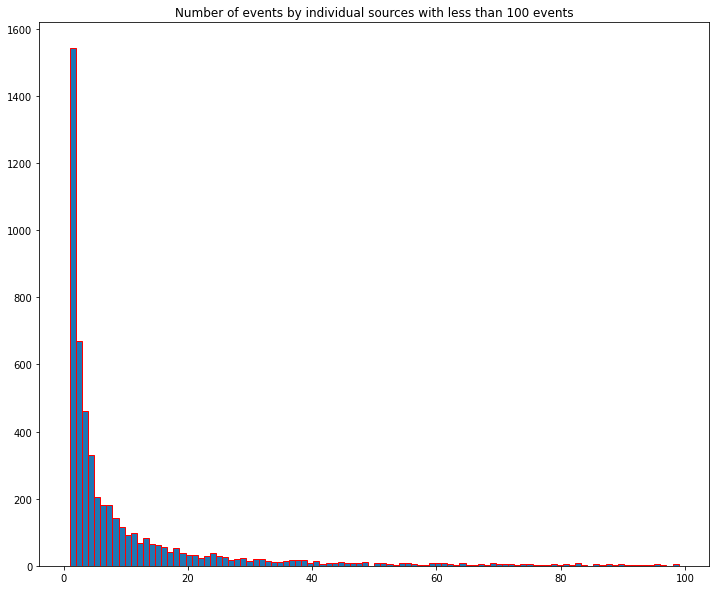

In [55]:
event_lim = 100
type_pct_df_mod = type_pct_df[type_pct_df.total < event_lim]

fig, ax = plt.subplots(figsize=(12,10))
ax.set_title(f'Number of events by individual sources with less than {event_lim} events')
plt.hist(type_pct_df_mod.total, edgecolor="red", bins=event_lim)

(array([32., 14., 23., 14., 11.,  6.,  5.,  5.,  4.,  2.,  0.,  5.,  2.,
         2.,  1.,  3.,  2.,  2.,  2.,  3.,  1.,  0.,  0.,  1.,  1.,  0.,
         3.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,
         0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([ 100.  ,  114.44,  128.88,  143.32,  157.76,  172.2 ,  186.64,
         201.08,  215.52,  229.96,  244.4 ,  258.84,  273.28,  287.72,
         302.16,  316.6 ,  331.04,  345.48,  359.92,  374.36,  388.8 ,
         403.24,  417.68,  432.12,  446.56,  461.  ,  475.44,  489.88,
         504.32,  518.76,  533.2 ,  547.64,  562.08,  576.52,  590.96,
         605.4 ,  619.84,  634.28,  648.72,  663.16,  677.6 ,  692.04,
        

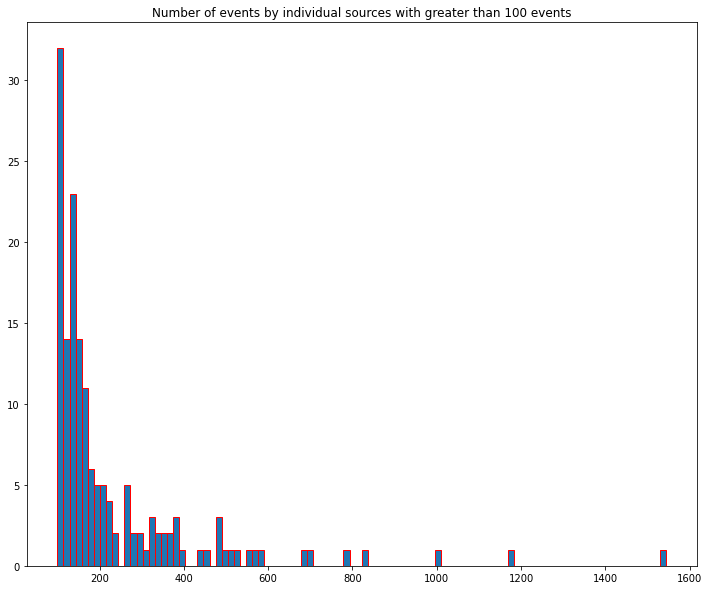

In [56]:
event_lim = 100
type_pct_df_mod = type_pct_df[type_pct_df.total >= event_lim]

fig, ax = plt.subplots(figsize=(12,10))
ax.set_title(f'Number of events by individual sources with greater than {event_lim} events')
plt.hist(type_pct_df_mod.total, edgecolor="red", bins=100)

Each record in the catalog will be a source. We need to determine how many minimum events a source needs for it to be in our catalog. For example, a source with only two events may not be sufficient for a user trying to discover data.

In [59]:
sql(f'''
SELECT
    source_singular,
    Change_to_group_activity,
    Change_to_group_activity_pct
FROM type_pct_df
WHERE total > 10
ORDER BY Change_to_group_activity_pct DESC
''')


,source_singular,Change_to_group_activity,Change_to_group_activity_pct
0,Kurdistan24,15,1.000000
1,TRT Haber,19,1.000000
2,Aydinlik,13,0.928571
3,Haber 7,22,0.916667
4,Anadolu Agency,81,0.900000
...,...,...,...
1436,Zim Eye,0,0.000000
1437,Zona Franca,0,0.000000
1438,net.hr,0,0.000000
1439,news.com.au,0,0.000000
